# Linearly constraint knapsack QUBO

In [162]:
import numpy as np
from openqaoa.problems import QUBO
from openqaoa.algorithms import QAOA
from openqaoa.backends import create_device
from qiskit import QuantumCircuit,QuantumRegister

In [113]:
items = range(4)
items_values = [2,3,4,3]
items_cost = [3,3,3,2]

weight_capacity = 7
n_items = 4
penalty = 2
weights = [3,3,4,3]
values = [1,3,4,5]

In [114]:
def terms_and_weights():
        n_variables_slack = int(np.ceil(np.log2(weight_capacity)))
        n_variables = n_items + n_variables_slack

        single_terms_slack = [#edges_slacks_with_weights = [
            ([e],penalty * (2 ** e))
            for e in range(n_variables_slack)
        ]

        # Linear terms for the decision variables (the x_i's)
        single_terms_decision = [#single_interaction_decisions_vars = [
            (
                [i],- values[i - n_variables_slack]
                + penalty * weights[i - n_variables_slack]
            )
            for i in range(n_variables_slack, n_variables)
        ]
    

        # The constant term
        constant_term = [([],  -penalty * weight_capacity)]

        # Unzip to retrieve terms and weights in separate sequences
        return tuple(
            zip(
                *(
                    single_terms_slack
                    +single_terms_decision
                    +constant_term
                )
            )
        )
qubo_terms,qubo_weights=terms_and_weights()
print(qubo_terms)
print(qubo_weights)

([0], [1], [2], [3], [4], [5], [6], [])
(2, 4, 8, 5, 3, 4, 1, -14)


In [121]:
def terms_and_weights2():
        n_variables = n_items 

        # Linear terms for the decision variables (the x_i's)
        single_terms_decision = [#single_interaction_decisions_vars = [
            (
                [i],- values[i]
            )
            for i in range(n_variables)
        ]
        # Unzip to retrieve terms and weights in separate sequences
        return tuple(
            zip(
                *(
                    single_terms_decision
                )
            )
        )
qubo_terms,qubo_weights=terms_and_weights2()
print(qubo_terms)
print(qubo_weights)

([0], [1], [2], [3])
(-1, -3, -4, -5)


In [125]:
#for 1st terms and weights
#ising_terms,ising_weights = QUBO.convert_qubo_to_ising(n=len(qubo_terms)-1,qubo_terms=qubo_terms,qubo_weights=qubo_weights)
#for 2nd terms and weights
ising_terms,ising_weights = QUBO.convert_qubo_to_ising(n=len(qubo_terms),qubo_terms=qubo_terms,qubo_weights=qubo_weights)

print(ising_terms)
print(ising_weights)
ising_knapsack = QUBO(n=len(ising_terms)-1,terms=ising_terms,weights=ising_weights)
ising_knapsack.hamiltonian.expression

[[0], [1], [2], [3], []]
[0.5, 1.5, 2.0, 2.5, -6.5]


-6.5 + 0.5Z_{0} + 1.5Z_{1} + 2.0Z_{2} + 2.5Z_{3}

In [153]:
q = QAOA()

# device
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q.set_device(qiskit_device)

# circuit properties
q.set_circuit_properties(p=2, param_type='standard', init_type='ramp', mixer_hamiltonian='x')

# backend properties (already set by default)
q.set_backend_properties(prepend_state=None, append_state=None)

# classical optimizer properties
q.set_classical_optimizer(method='powell', maxiter=200, tol=0.01,
                          optimization_progress=True, cost_progress=True, parameter_log=True)
q.compile(ising_knapsack)


In [164]:
qc2 = q.backend.parametric_circuit.draw()
r = QuantumRegister( n_item,label='R')
qc = QuantumCircuit(r)

NameError: name 'n_item' is not defined

In [136]:
q.optimize()

{'solutions_bitstrings': ['1111', '0111', '1011'], 'bitstrings_energies': [-13.0, -12.0, -10.0], 'probabilities': [0.6681031966366638, 0.27987701447644026, 0.021265818908957467]}
states kept: 16


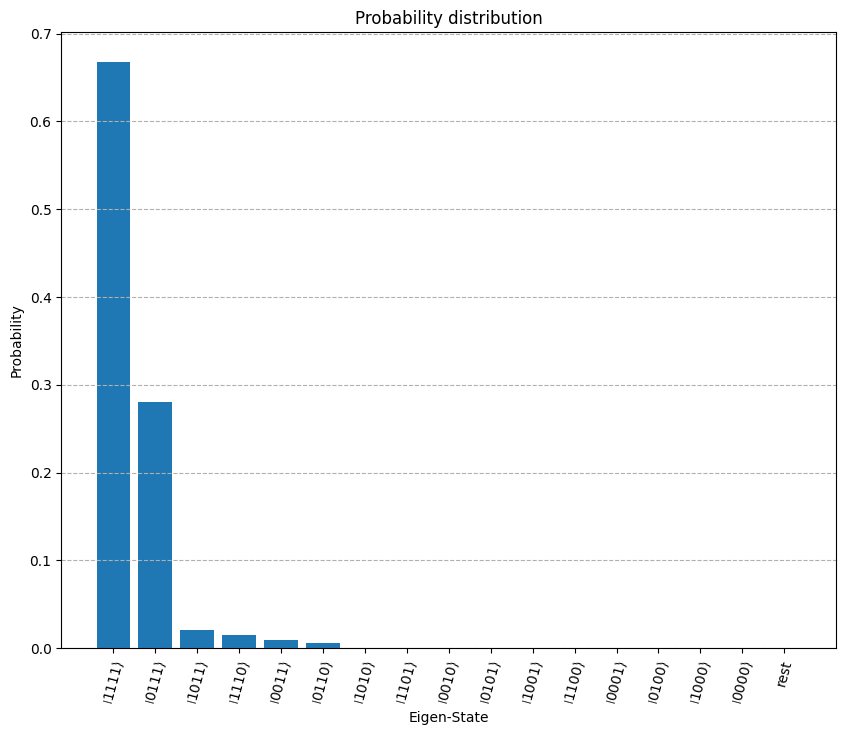

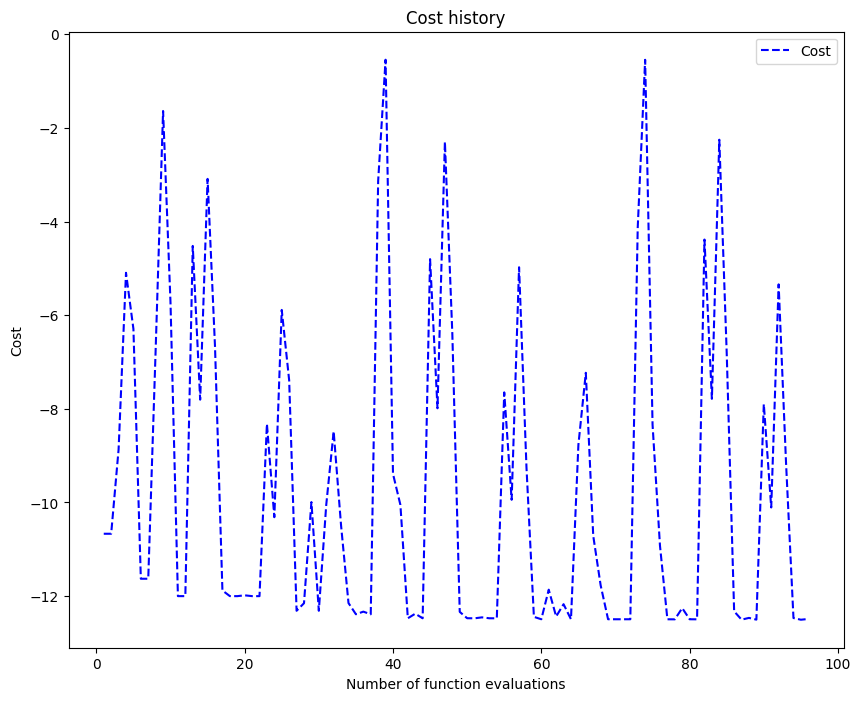

In [129]:
result = q.result
print(result.lowest_cost_bitstrings(3))
result.plot_probabilities()
result.plot_cost()